In [29]:
import numpy as np
from random import randint
import math 
e=math.e

In [30]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [31]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = (2*(pow(e,-x))*x*z) - 2*(pow(y,3)) + pow(y,2) - 3*(pow(z,3))
   return fitness

In [32]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [33]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [34]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(0, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [35]:


num_var = 3
sizeof_pop= 100
upper_limit = 10000
lower_limit = 0
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[ 240.23798945 7080.81635696 5834.57996776]
 [7517.01149306 2980.6100966  6963.25464982]
 [3773.56786085 6456.55987993 5362.65511994]
 [5380.50514133 1415.07724568 1331.10498771]
 [6959.94734693 5789.89640799 3530.05742223]
 [1056.37622688 8053.62390512 6272.46118685]
 [  81.30087073 4466.9647114  6132.07731231]
 [3219.02447116 7718.31328628 8897.65369926]
 [9000.37205077 7965.56619905 3061.44225965]
 [6498.91789879 9822.74179648 3165.07098968]
 [4662.57379189 9307.17739736 2123.93437015]
 [6519.02939992 6196.74717721 8773.76077271]
 [8539.52349341 8764.37183323 8638.57713921]
 [9661.11241099 4508.47538255 5959.55930416]
 [4126.70145988 2018.57236077  326.09411325]
 [4529.3416024  5064.21879249 8732.55715661]
 [1488.66998079 1736.14570722 4625.43015095]
 [7044.82210311 9299.42752353 2548.56102421]
 [9545.34780604 7181.97898483 6809.82136003]
 [ 323.3157399  7134.90301042 6727.509066  ]
 [4685.67933423 1746.5384769  7346.732476  ]
 [6391.91972022 2222.78048214 9728.4725049 ]
 [7673.862

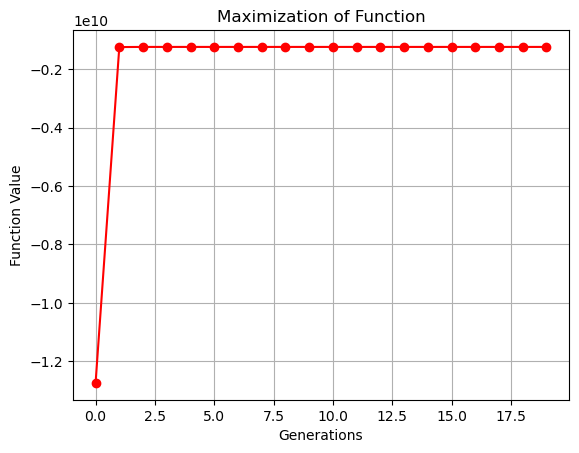

In [36]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()